In [1]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Datasets

In [2]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)



# Implement multi-class logistic regression

In [3]:
# requirement
import numpy as np
import matplotlib.pyplot as plt

# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

# start
x_d5 = np.hstack([x_d5, np.ones((n, 1))])
_, dim = x_d5.shape
init_W = np.random.rand(dim, dim)
hat_W = init_W
lam = 0.5
iterations = 200

alpha = 0.01

def softmax(x):
    ex = np.exp(x)
    return ex / ex.sum(axis=0)

def loss(hat_W):
  loss = 0.0
  for x, y in zip(x_d5, y_d5):
    y_pred = softmax(np.dot(hat_W, x))
    loss += np.sum(-np.log(y_pred[y]))
  loss += lam * np.sum(hat_W * hat_W)
  return loss

def category_encode(y):
  one_hot_vector = np.zeros(dim)
  one_hot_vector[y] = 1.0
  return one_hot_vector

def gradient(hat_W):
  gradient = np.zeros((dim, dim))
  for x, y in zip(x_d5, y_d5):
    y_pred = softmax(np.dot(hat_W, x))
    gradient += np.outer(y_pred - category_encode(y), x)
  gradient += 2 * lam * hat_W
  return gradient

def hessian(hat_W):
  hessian = np.zeros((dim, dim))
  for x in x_d5:
    y_pred = softmax(np.dot(hat_W, x))
    hessian += (np.outer(y_pred, y_pred) - np.eye(dim, dim) * y_pred) * (np.outer(x, x))
  hessian += lam * np.eye(dim, dim)
  return hessian

initial_loss = loss(hat_W)
loss_hist_batch = [initial_loss]
loss_diff_batch = []

loss_hist_newton = [initial_loss]
loss_diff_newton = []

for t in range(iterations):
  hat_W -= alpha * gradient(hat_W)

  current_loss = loss(hat_W)
  # print(current_loss)
  loss_hist_batch.append(current_loss)
  loss_diff_batch.append(loss_hist_batch[t] - current_loss)

hat_W = init_W
for t in range(iterations):
  hat_W += alpha * np.linalg.inv(hessian(hat_W)).dot(gradient(hat_W))

  current_loss = loss(hat_W)
  loss_hist_newton.append(current_loss)
  loss_diff_newton.append(loss_hist_newton[t] - current_loss)


# Compare the performance of the above two optimization methods by showing loss difference between every iteration

In [6]:
def exportPDF(filename):
  pp = PdfPages(filename)
  pp.savefig()
  pp.close()

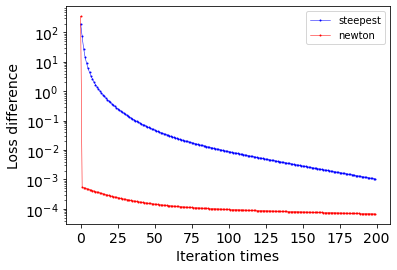

In [7]:
# Plotter format
plot_font = {'size': 14}
plt.yscale('log')
plt.xticks(fontSize=14)
plt.yticks(fontSize=14)
plt.xlabel('Iteration times', fontdict=plot_font)
plt.ylabel('Loss difference', fontdict=plot_font)

# Plot the results
plt.plot(loss_diff_batch, 'bo-', linewidth=0.5, markersize=1, label='steepest')
plt.plot(loss_diff_newton, 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()

plt.subplots_adjust(left=0.15)

exportPDF('loss-difference-multi-logisitic.pdf')